# IPL Dataset - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on IPL (Indian Premier League) datasets including:
- Match summaries (matches.csv)
- Ball-by-ball data (deliveries.csv)

## Objectives:
1. Data Acquisition & Merging
2. Data Schema Inspection
3. Data Quality Assessment
4. Data Cleaning
5. Exploratory Data Analysis:
   - Distributions of runs
   - Wickets analysis
   - Venue statistics
   - Team performance metrics


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Acquisition & Loading


In [2]:
# Load datasets
matches = pd.read_csv('data/matches.csv')
deliveries = pd.read_csv('data/deliveries.csv')

print("Data loaded successfully!")
print(f"\nMatches dataset shape: {matches.shape}")
print(f"Deliveries dataset shape: {deliveries.shape}")


Data loaded successfully!

Matches dataset shape: (756, 18)
Deliveries dataset shape: (179078, 21)


## 2. Data Schema Inspection


In [3]:
# Inspect matches dataset
print("=" * 60)
print("MATCHES DATASET SCHEMA")
print("=" * 60)
print(f"\nShape: {matches.shape}")
print(f"\nColumns: {list(matches.columns)}")
print("\nFirst few rows:")
matches.head()


MATCHES DATASET SCHEMA

Shape: (756, 18)

Columns: ['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']

First few rows:


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# Inspect deliveries dataset
print("=" * 60)
print("DELIVERIES DATASET SCHEMA")
print("=" * 60)
print(f"\nShape: {deliveries.shape}")
print(f"\nColumns: {list(deliveries.columns)}")
print("\nFirst few rows:")
deliveries.head()


DELIVERIES DATASET SCHEMA

Shape: (179078, 21)

Columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder']

First few rows:


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
# Data types and basic info
print("=" * 60)
print("MATCHES DATASET INFO")
print("=" * 60)
matches.info()


MATCHES DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3       

In [6]:
print("=" * 60)
print("DELIVERIES DATASET INFO")
print("=" * 60)
deliveries.info()


DELIVERIES DATASET INFO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## 3. Data Quality Assessment


MISSING VALUES - MATCHES
                 Missing Count  Percentage
umpire3                    637   84.259259
city                         7    0.925926
winner                       4    0.529101
player_of_match              4    0.529101
umpire1                      2    0.264550
umpire2                      2    0.264550


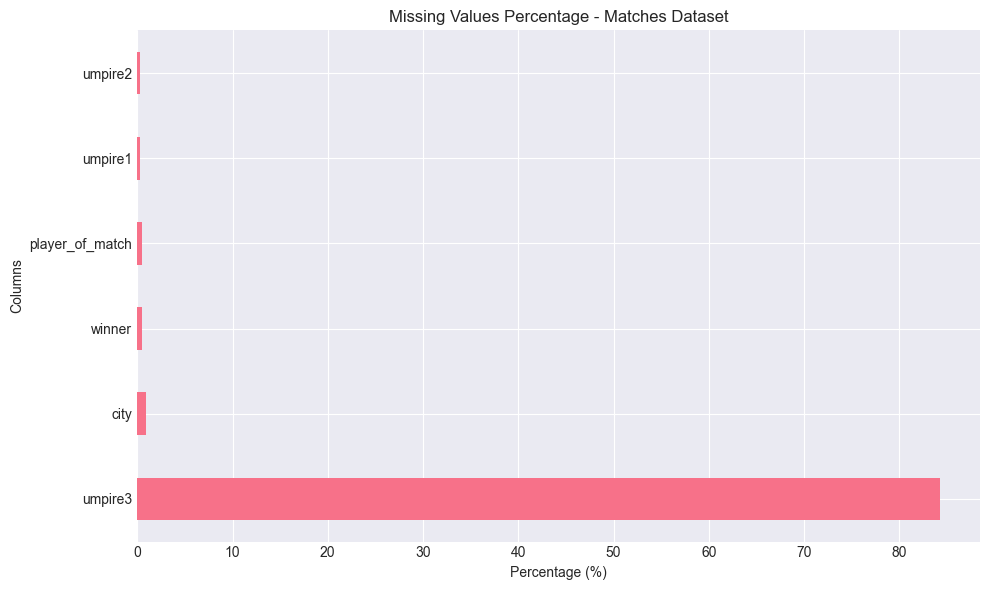

In [7]:
# Missing values analysis
print("=" * 60)
print("MISSING VALUES - MATCHES")
print("=" * 60)
missing_matches = matches.isnull().sum()
missing_matches_pct = (missing_matches / len(matches)) * 100
missing_df_matches = pd.DataFrame({
    'Missing Count': missing_matches,
    'Percentage': missing_matches_pct
})
missing_df_matches = missing_df_matches[missing_df_matches['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df_matches)

if len(missing_df_matches) > 0:
    plt.figure(figsize=(10, 6))
    missing_df_matches['Percentage'].plot(kind='barh')
    plt.title('Missing Values Percentage - Matches Dataset')
    plt.xlabel('Percentage (%)')
    plt.ylabel('Columns')
    plt.tight_layout()
    plt.show()


MISSING VALUES - DELIVERIES
                  Missing Count  Percentage
fielder                  172630   96.399334
player_dismissed         170244   95.066954
dismissal_kind           170244   95.066954


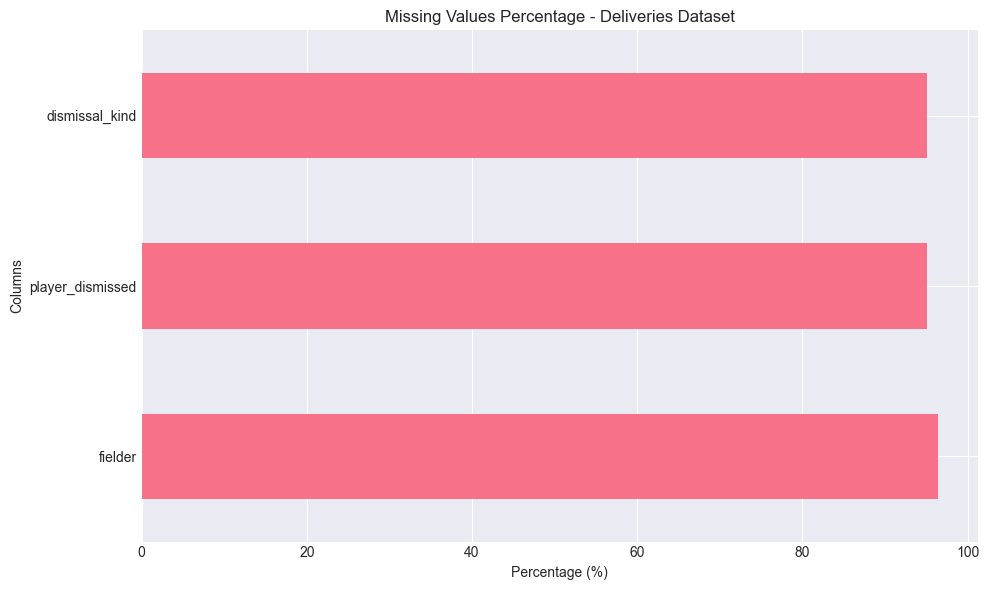

In [8]:
print("=" * 60)
print("MISSING VALUES - DELIVERIES")
print("=" * 60)
missing_deliveries = deliveries.isnull().sum()
missing_deliveries_pct = (missing_deliveries / len(deliveries)) * 100
missing_df_deliveries = pd.DataFrame({
    'Missing Count': missing_deliveries,
    'Percentage': missing_deliveries_pct
})
missing_df_deliveries = missing_df_deliveries[missing_df_deliveries['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df_deliveries)

if len(missing_df_deliveries) > 0:
    plt.figure(figsize=(10, 6))
    missing_df_deliveries['Percentage'].plot(kind='barh')
    plt.title('Missing Values Percentage - Deliveries Dataset')
    plt.xlabel('Percentage (%)')
    plt.ylabel('Columns')
    plt.tight_layout()
    plt.show()


## 4. Data Cleaning


In [9]:
# Load pre-cleaned datasets (already cleaned and saved)
matches_clean = pd.read_csv('data/matches_cleaned.csv')
deliveries_clean = pd.read_csv('data/deliveries_cleaned.csv')

# Load merged data if it exists, otherwise merge them
try:
    merged_data = pd.read_csv('data/merged_data.csv')
    print("Loaded pre-merged data!")
except:
    # Merge datasets if merged_data doesn't exist
    merged_data = deliveries_clean.merge(matches_clean, on='id', how='left')
    merged_data.to_csv('data/merged_data.csv', index=False)
    print("Merged and saved data!")

print(f"\nCleaned Matches shape: {matches_clean.shape}")
print(f"Cleaned Deliveries shape: {deliveries_clean.shape}")
print(f"Merged Data shape: {merged_data.shape}")


Loaded pre-merged data!

Cleaned Matches shape: (756, 20)
Cleaned Deliveries shape: (179078, 25)
Merged Data shape: (179078, 45)


In [10]:
# Verify date format conversion
print("Date column sample (after cleaning):")
print(matches_clean[['id', 'date', 'year', 'month']].head(10))
# Convert date column to datetime to avoid type errors
matches_clean['date'] = pd.to_datetime(matches_clean['date'], errors='coerce')
print(f"\nDate range: {matches_clean['date'].min()} to {matches_clean['date'].max()}")


Date column sample (after cleaning):
   id        date    year  month
0   1  2017-04-05  2017.0    4.0
1   2  2017-04-06  2017.0    4.0
2   3  2017-04-07  2017.0    4.0
3   4  2017-04-08  2017.0    4.0
4   5  2017-04-08  2017.0    4.0
5   6  2017-04-09  2017.0    4.0
6   7  2017-04-09  2017.0    4.0
7   8  2017-04-10  2017.0    4.0
8   9  2017-04-11  2017.0    4.0
9  10  2017-04-12  2017.0    4.0

Date range: 2008-04-18 00:00:00 to 2017-05-21 00:00:00


## 5. Exploratory Data Analysis

### 5.1 Distribution of Runs


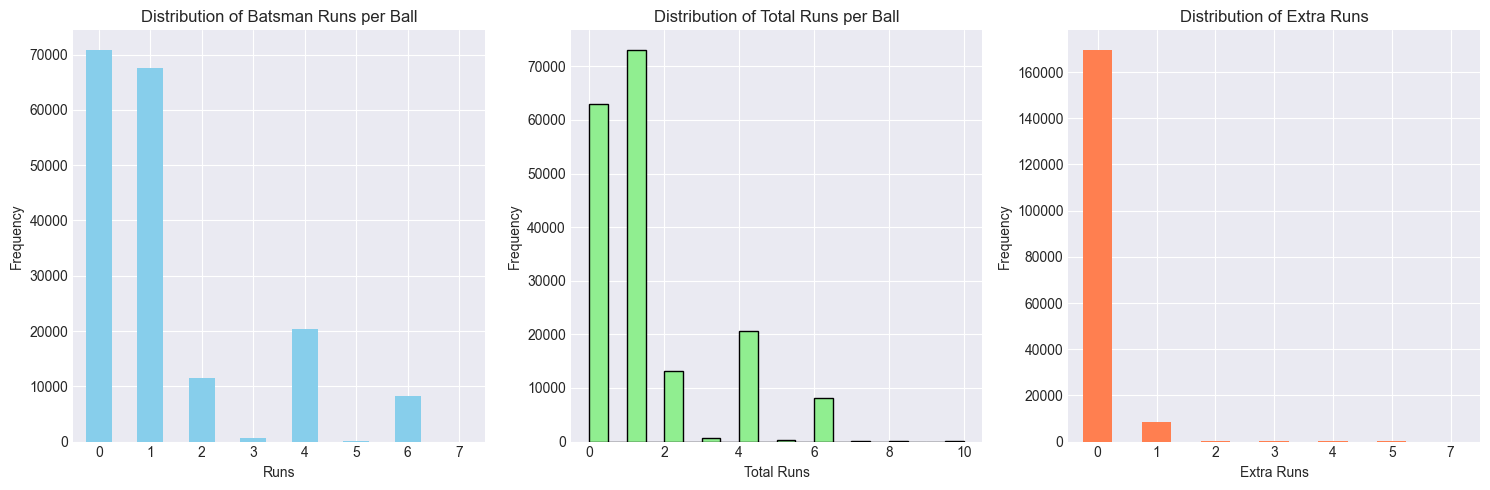

Mean batsman runs per ball: 1.25
Mean total runs per ball: 1.31
Most common runs per ball: 0


In [11]:
# Distribution of runs per ball
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
deliveries_clean['batsman_runs'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Batsman Runs per Ball')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
deliveries_clean['total_runs'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Runs per Ball')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
deliveries_clean['extra_runs'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title('Distribution of Extra Runs')
plt.xlabel('Extra Runs')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"Mean batsman runs per ball: {deliveries_clean['batsman_runs'].mean():.2f}")
print(f"Mean total runs per ball: {deliveries_clean['total_runs'].mean():.2f}")
print(f"Most common runs per ball: {deliveries_clean['batsman_runs'].mode()[0]}")


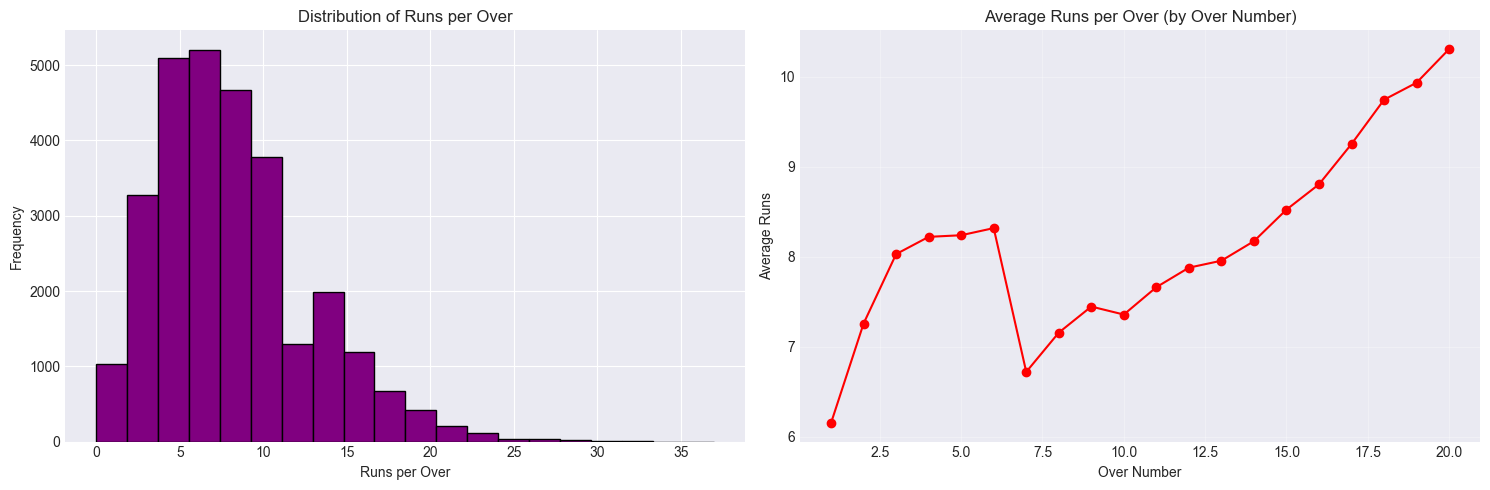


Mean runs per over: 8.10
Median runs per over: 7.00
Max runs in an over: 37


In [12]:
# Runs per over analysis
runs_per_over = deliveries_clean.groupby(['match_id', 'inning', 'over'])['total_runs'].sum().reset_index()
runs_per_over.columns = ['match_id', 'inning', 'over', 'runs_in_over']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
runs_per_over['runs_in_over'].hist(bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Runs per Over')
plt.xlabel('Runs per Over')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
runs_per_over.groupby('over')['runs_in_over'].mean().plot(kind='line', marker='o', color='red')
plt.title('Average Runs per Over (by Over Number)')
plt.xlabel('Over Number')
plt.ylabel('Average Runs')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nMean runs per over: {runs_per_over['runs_in_over'].mean():.2f}")
print(f"Median runs per over: {runs_per_over['runs_in_over'].median():.2f}")
print(f"Max runs in an over: {runs_per_over['runs_in_over'].max()}")


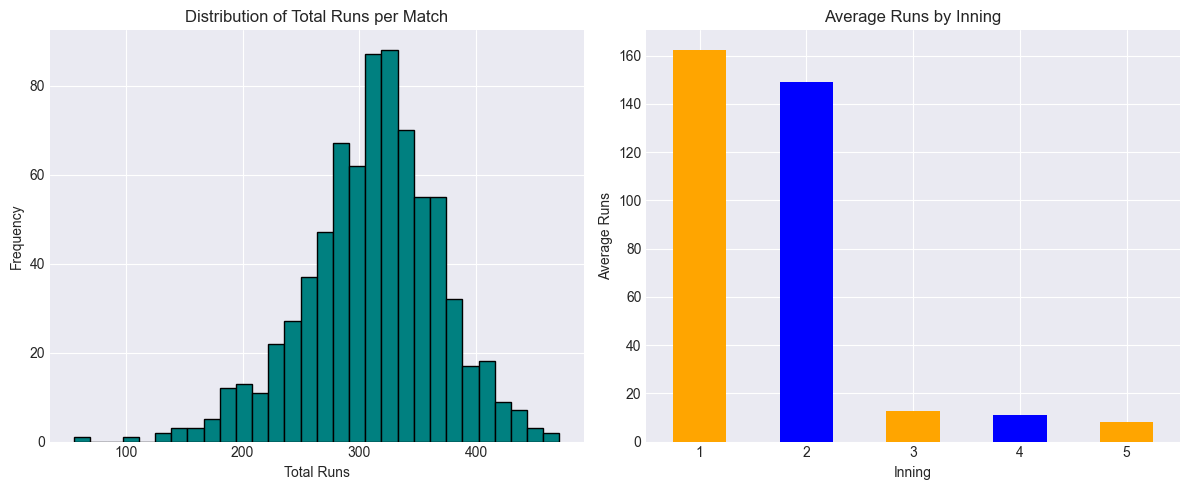

Mean total runs per match: 311.23
Mean runs in 1st inning: 162.38
Mean runs in 2nd inning: 148.97


In [13]:
# Total runs per match
runs_per_match = deliveries_clean.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
total_runs_per_match = runs_per_match.groupby('match_id')['total_runs'].sum().reset_index()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
total_runs_per_match['total_runs'].hist(bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Total Runs per Match')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
runs_per_match.groupby('inning')['total_runs'].mean().plot(kind='bar', color=['orange', 'blue'])
plt.title('Average Runs by Inning')
plt.xlabel('Inning')
plt.ylabel('Average Runs')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"Mean total runs per match: {total_runs_per_match['total_runs'].mean():.2f}")
print(f"Mean runs in 1st inning: {runs_per_match[runs_per_match['inning']==1]['total_runs'].mean():.2f}")
print(f"Mean runs in 2nd inning: {runs_per_match[runs_per_match['inning']==2]['total_runs'].mean():.2f}")


### 5.2 Wickets Analysis


Total wickets in dataset: 8834
Wickets per match (average): 11.69


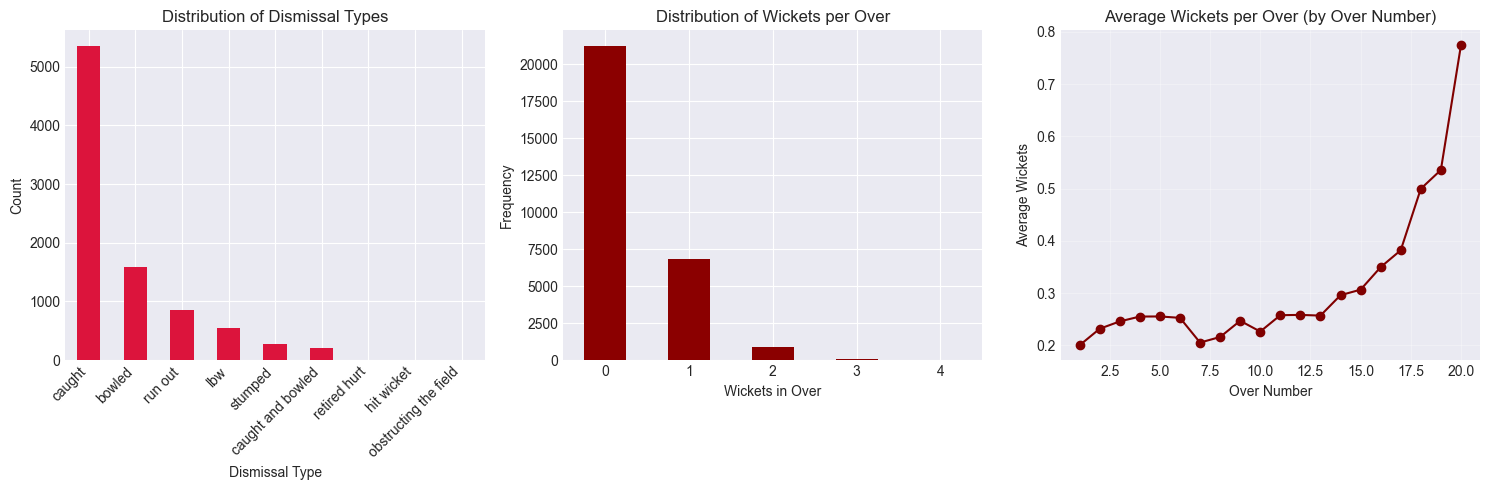


Dismissal types breakdown:
dismissal_kind
caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: count, dtype: int64


In [14]:
# Wickets analysis
wickets_data = deliveries_clean[deliveries_clean['is_wicket'] == 1]

print(f"Total wickets in dataset: {len(wickets_data)}")
print(f"Wickets per match (average): {len(wickets_data) / matches_clean.shape[0]:.2f}")

# Dismissal types
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
dismissal_counts = wickets_data['dismissal_kind'].value_counts()
dismissal_counts.plot(kind='bar', color='crimson')
plt.title('Distribution of Dismissal Types')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
wickets_per_over = deliveries_clean.groupby(['match_id', 'inning', 'over'])['is_wicket'].sum().reset_index()
wickets_per_over.columns = ['match_id', 'inning', 'over', 'wickets_in_over']
wickets_per_over['wickets_in_over'].value_counts().sort_index().plot(kind='bar', color='darkred')
plt.title('Distribution of Wickets per Over')
plt.xlabel('Wickets in Over')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
wickets_by_over_num = wickets_per_over.groupby('over')['wickets_in_over'].mean()
wickets_by_over_num.plot(kind='line', marker='o', color='maroon')
plt.title('Average Wickets per Over (by Over Number)')
plt.xlabel('Over Number')
plt.ylabel('Average Wickets')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDismissal types breakdown:")
print(dismissal_counts)


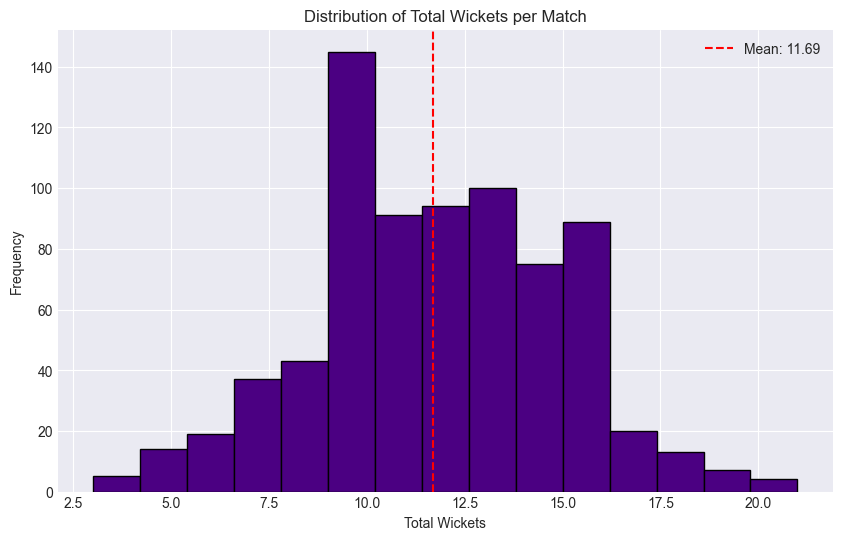

Mean wickets per match: 11.69
Median wickets per match: 12.00
Min wickets in a match: 3
Max wickets in a match: 21


In [15]:
# Wickets per match
wickets_per_match = deliveries_clean.groupby('match_id')['is_wicket'].sum().reset_index()
wickets_per_match.columns = ['match_id', 'total_wickets']

plt.figure(figsize=(10, 6))
wickets_per_match['total_wickets'].hist(bins=15, color='indigo', edgecolor='black')
plt.title('Distribution of Total Wickets per Match')
plt.xlabel('Total Wickets')
plt.ylabel('Frequency')
plt.axvline(wickets_per_match['total_wickets'].mean(), color='red', linestyle='--', 
            label=f"Mean: {wickets_per_match['total_wickets'].mean():.2f}")
plt.legend()
plt.show()

print(f"Mean wickets per match: {wickets_per_match['total_wickets'].mean():.2f}")
print(f"Median wickets per match: {wickets_per_match['total_wickets'].median():.2f}")
print(f"Min wickets in a match: {wickets_per_match['total_wickets'].min()}")
print(f"Max wickets in a match: {wickets_per_match['total_wickets'].max()}")


### 5.3 Venue Statistics


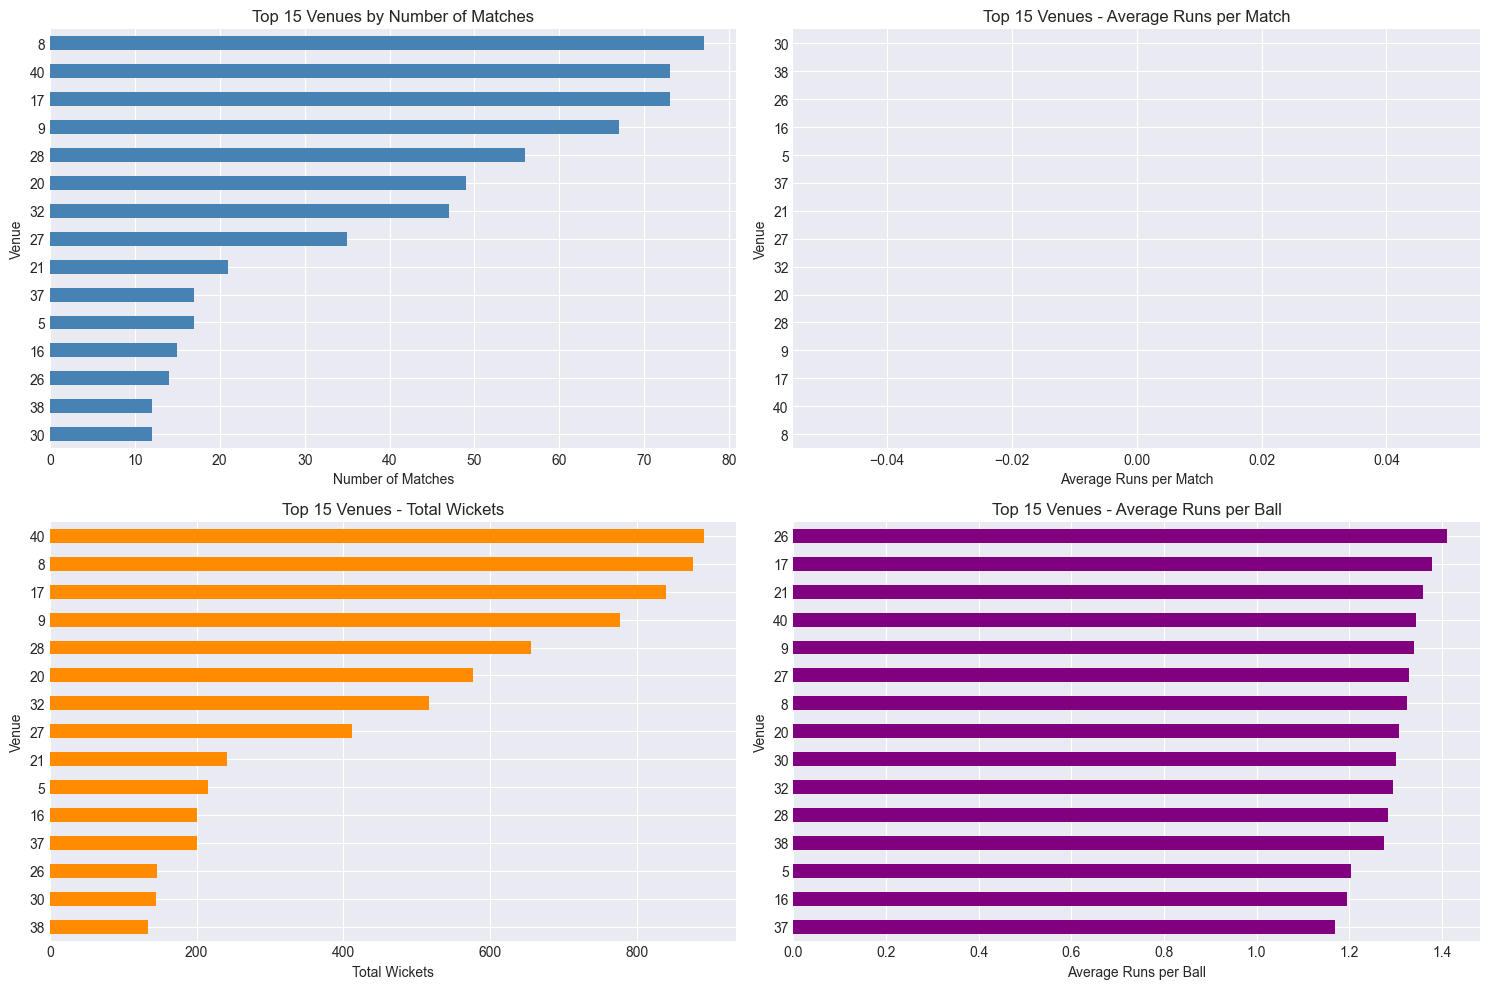

Top 10 Venues by Matches Played:
                                         venue  matches_played  \
8                                 Eden Gardens              77   
40                            Wankhede Stadium              73   
17                       M Chinnaswamy Stadium              73   
9                             Feroz Shah Kotla              67   
28   Rajiv Gandhi International Stadium, Uppal              56   
20             MA Chidambaram Stadium, Chepauk              49   
32                      Sawai Mansingh Stadium              47   
27  Punjab Cricket Association Stadium, Mohali              35   
21     Maharashtra Cricket Association Stadium              21   
37                  Subrata Roy Sahara Stadium              17   

    avg_runs_per_match  total_wickets  
8                  NaN            877  
40                 NaN            891  
17                 NaN            840  
9                  NaN            777  
28                 NaN            655  


In [16]:
# Venue analysis
venue_stats = merged_data.groupby('venue').agg({
    'total_runs': 'mean',
    'is_wicket': 'sum',
    'match_id': 'nunique'
}).reset_index()
venue_stats.columns = ['venue', 'avg_runs_per_ball', 'total_wickets', 'matches_played']
venue_stats['avg_runs_per_match'] = merged_data.groupby('venue')['total_runs'].sum() / venue_stats['matches_played']
venue_stats = venue_stats.sort_values('matches_played', ascending=False)

# Top venues by number of matches
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
top_venues = venue_stats.head(15)
top_venues['matches_played'].plot(kind='barh', color='steelblue')
plt.title('Top 15 Venues by Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.gca().invert_yaxis()

plt.subplot(2, 2, 2)
top_venues = venue_stats.head(15)
top_venues['avg_runs_per_match'].sort_values().plot(kind='barh', color='forestgreen')
plt.title('Top 15 Venues - Average Runs per Match')
plt.xlabel('Average Runs per Match')
plt.ylabel('Venue')

plt.subplot(2, 2, 3)
venue_stats.head(15)['total_wickets'].sort_values().plot(kind='barh', color='darkorange')
plt.title('Top 15 Venues - Total Wickets')
plt.xlabel('Total Wickets')
plt.ylabel('Venue')

plt.subplot(2, 2, 4)
venue_stats.head(15)['avg_runs_per_ball'].sort_values().plot(kind='barh', color='purple')
plt.title('Top 15 Venues - Average Runs per Ball')
plt.xlabel('Average Runs per Ball')
plt.ylabel('Venue')

plt.tight_layout()
plt.show()

print("Top 10 Venues by Matches Played:")
print(venue_stats[['venue', 'matches_played', 'avg_runs_per_match', 'total_wickets']].head(10))


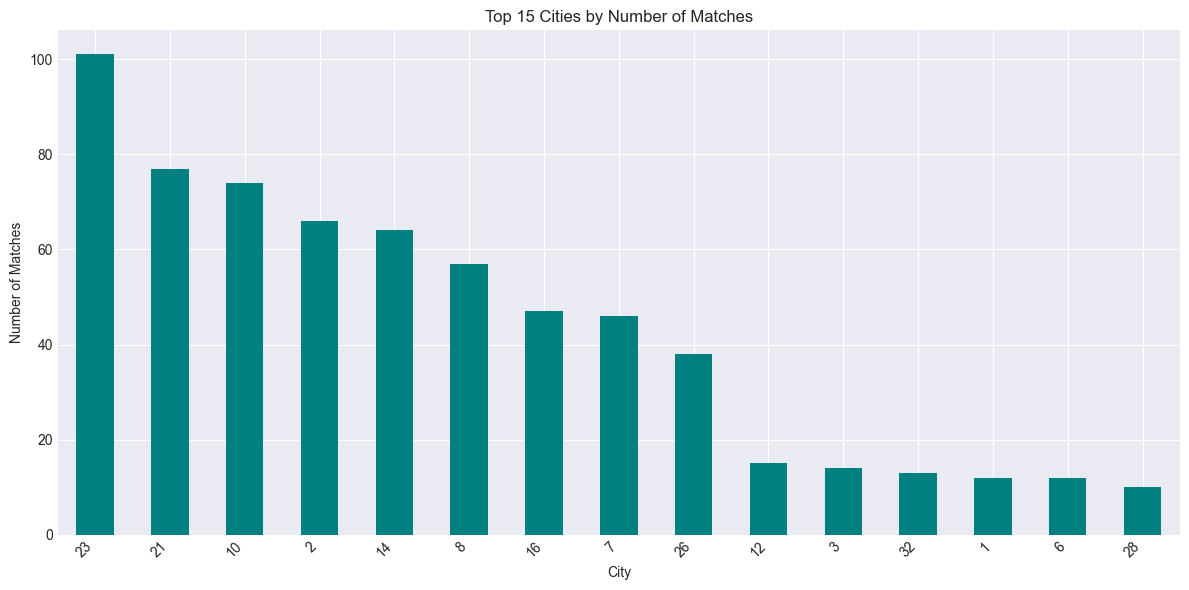

Top 10 Cities by Matches:
          city  total_matches  completed_matches
23      Mumbai            101                101
21     Kolkata             77                 77
10       Delhi             74                 73
2    Bangalore             66                 64
14   Hyderabad             64                 64
8      Chennai             57                 57
16      Jaipur             47                 47
7   Chandigarh             46                 46
26        Pune             38                 38
12      Durban             15                 15


In [17]:
# City-wise analysis
city_stats = matches_clean.groupby('city').agg({
    'id': 'count',
    'winner': lambda x: x[x != 'No Result'].count()
}).reset_index()
city_stats.columns = ['city', 'total_matches', 'completed_matches']
city_stats = city_stats.sort_values('total_matches', ascending=False)

plt.figure(figsize=(12, 6))
city_stats.head(15)['total_matches'].plot(kind='bar', color='teal')
plt.title('Top 15 Cities by Number of Matches')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 10 Cities by Matches:")
print(city_stats.head(10))


### 5.4 Team Performance Analysis


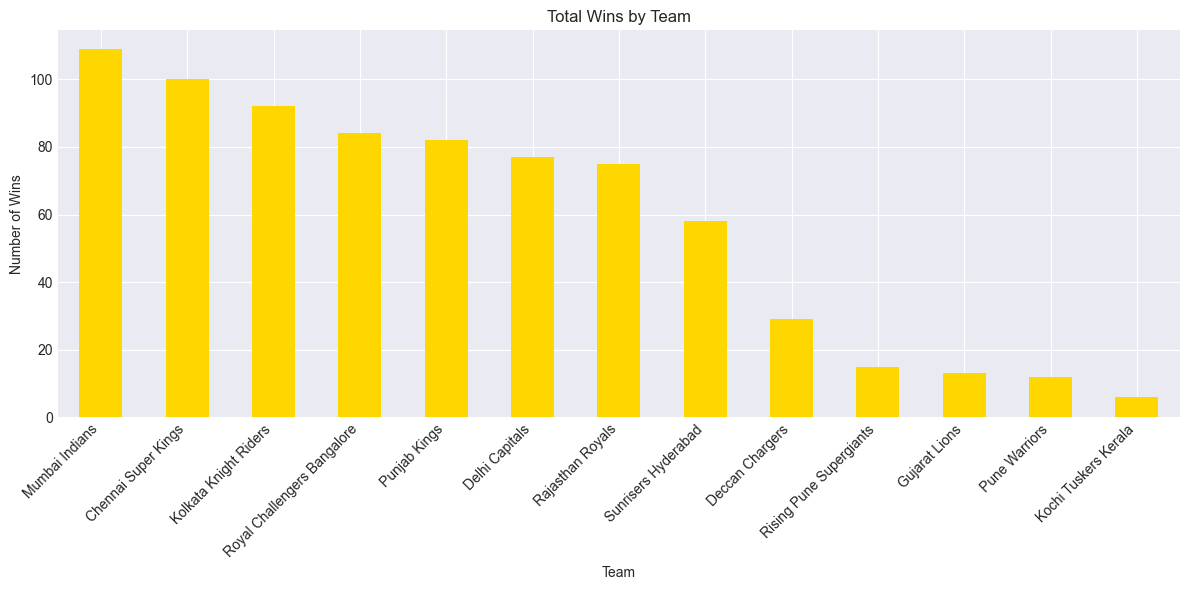

Team Wins:
winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Punjab Kings                    82
Delhi Capitals                  77
Rajasthan Royals                75
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
dtype: int64


In [18]:
# Team performance - wins
team_wins = matches_clean[matches_clean['winner'] != 'No Result'].groupby('winner').size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
team_wins.plot(kind='bar', color='gold')
plt.title('Total Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Team Wins:")
print(team_wins)


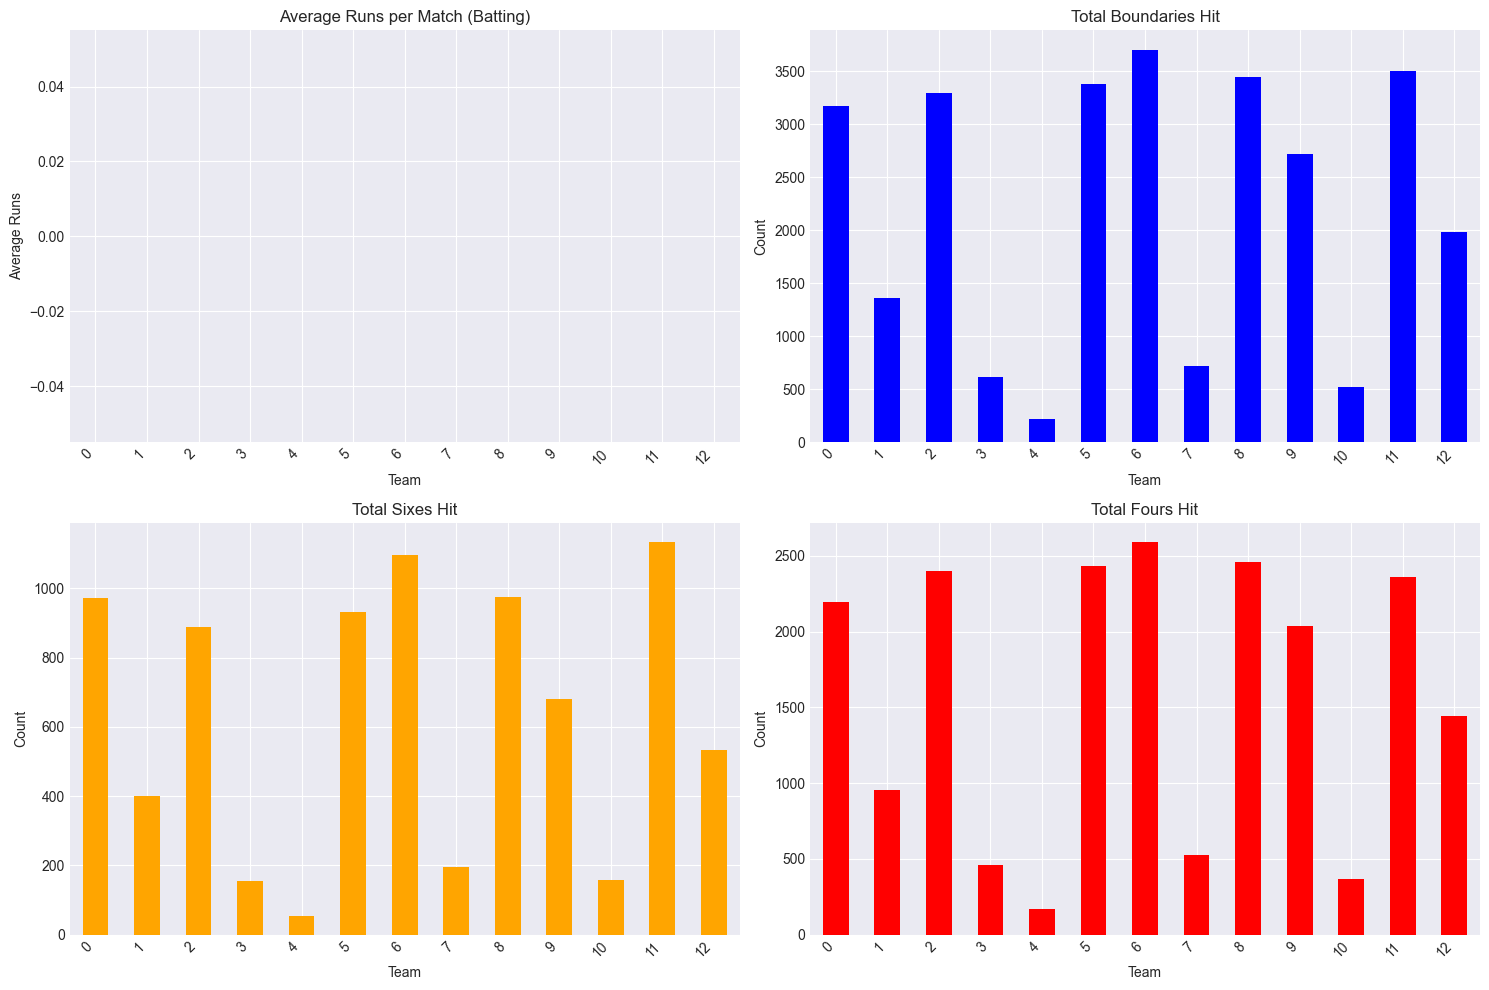

Team Batting Performance:
                           team  avg_runs_per_match  total_boundaries  \
0           Chennai Super Kings                 NaN              3176   
1               Deccan Chargers                 NaN              1362   
2                Delhi Capitals                 NaN              3295   
3                 Gujarat Lions                 NaN               616   
4          Kochi Tuskers Kerala                 NaN               223   
5         Kolkata Knight Riders                 NaN              3381   
6                Mumbai Indians                 NaN              3702   
7                 Pune Warriors                 NaN               723   
8                  Punjab Kings                 NaN              3443   
9              Rajasthan Royals                 NaN              2721   
10      Rising Pune Supergiants                 NaN               525   
11  Royal Challengers Bangalore                 NaN              3500   
12          Sunrisers Hyd

In [19]:
# Team batting performance
team_batting = deliveries_clean.groupby('batting_team').agg({
    'total_runs': ['sum', 'mean'],
    'batsman_runs': 'mean',
    'is_wicket': 'sum',
    'is_boundary': 'sum',
    'is_six': 'sum',
    'is_four': 'sum'
}).reset_index()
team_batting.columns = ['team', 'total_runs', 'avg_runs_per_ball', 'avg_batsman_runs', 
                        'total_wickets', 'total_boundaries', 'total_sixes', 'total_fours']
team_batting['matches_batted'] = deliveries_clean.groupby('batting_team')['match_id'].nunique()
team_batting['avg_runs_per_match'] = team_batting['total_runs'] / team_batting['matches_batted']
team_batting = team_batting.sort_values('avg_runs_per_match', ascending=False)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
team_batting['avg_runs_per_match'].plot(kind='bar', color='green')
plt.title('Average Runs per Match (Batting)')
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
team_batting['total_boundaries'].plot(kind='bar', color='blue')
plt.title('Total Boundaries Hit')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
team_batting['total_sixes'].plot(kind='bar', color='orange')
plt.title('Total Sixes Hit')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
team_batting['total_fours'].plot(kind='bar', color='red')
plt.title('Total Fours Hit')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Team Batting Performance:")
print(team_batting[['team', 'avg_runs_per_match', 'total_boundaries', 'total_sixes', 'total_fours']])


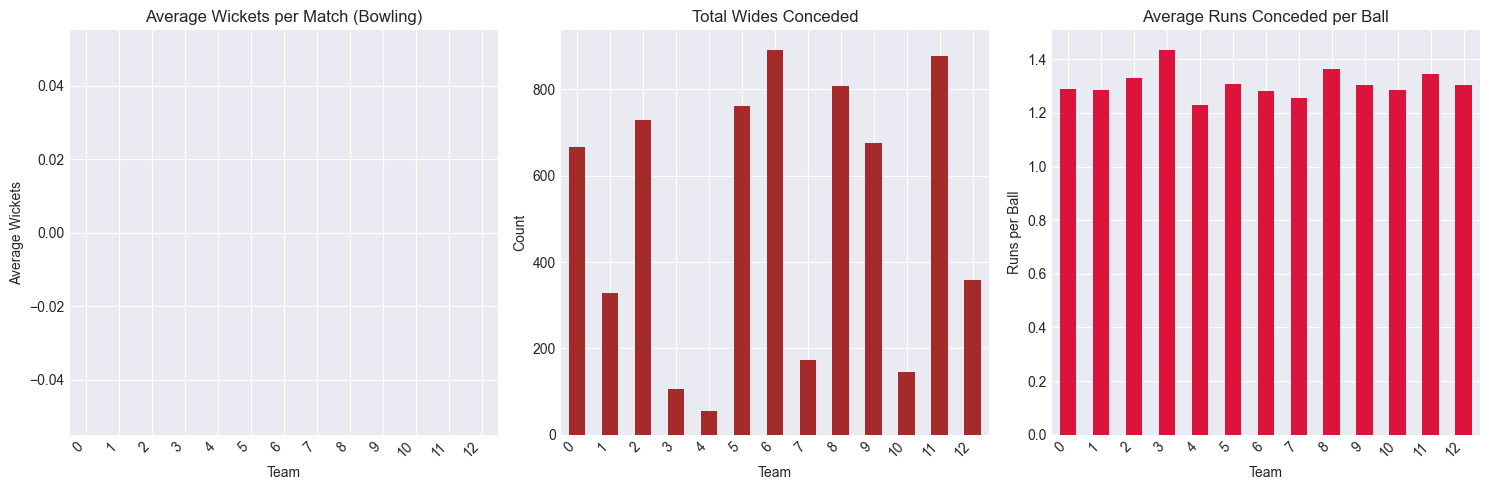

Team Bowling Performance:
                           team  avg_wickets_per_match  total_wides  \
0           Chennai Super Kings                    NaN          667   
1               Deccan Chargers                    NaN          328   
2                Delhi Capitals                    NaN          728   
3                 Gujarat Lions                    NaN          107   
4          Kochi Tuskers Kerala                    NaN           56   
5         Kolkata Knight Riders                    NaN          761   
6                Mumbai Indians                    NaN          892   
7                 Pune Warriors                    NaN          174   
8                  Punjab Kings                    NaN          807   
9              Rajasthan Royals                    NaN          675   
10      Rising Pune Supergiants                    NaN          146   
11  Royal Challengers Bangalore                    NaN          877   
12          Sunrisers Hyderabad                    

In [20]:
# Team bowling performance
team_bowling = deliveries_clean.groupby('bowling_team').agg({
    'is_wicket': 'sum',
    'total_runs': 'mean',
    'wide_runs': 'sum',
    'noball_runs': 'sum'
}).reset_index()
team_bowling.columns = ['team', 'total_wickets', 'avg_runs_conceded_per_ball', 
                        'total_wides', 'total_noballs']
team_bowling['matches_bowled'] = deliveries_clean.groupby('bowling_team')['match_id'].nunique()
team_bowling['avg_wickets_per_match'] = team_bowling['total_wickets'] / team_bowling['matches_bowled']
team_bowling = team_bowling.sort_values('avg_wickets_per_match', ascending=False)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
team_bowling['avg_wickets_per_match'].plot(kind='bar', color='purple')
plt.title('Average Wickets per Match (Bowling)')
plt.xlabel('Team')
plt.ylabel('Average Wickets')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
team_bowling['total_wides'].plot(kind='bar', color='brown')
plt.title('Total Wides Conceded')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
team_bowling['avg_runs_conceded_per_ball'].plot(kind='bar', color='crimson')
plt.title('Average Runs Conceded per Ball')
plt.xlabel('Team')
plt.ylabel('Runs per Ball')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Team Bowling Performance:")
print(team_bowling[['team', 'avg_wickets_per_match', 'total_wides', 'avg_runs_conceded_per_ball']])


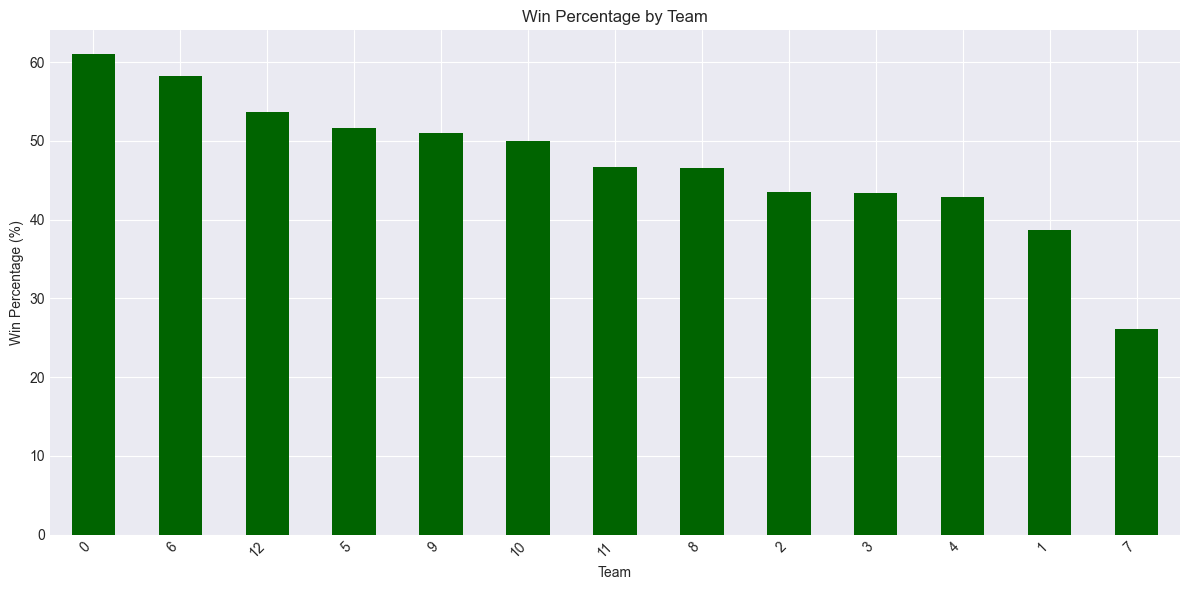

Team Win Percentage:
                           team  total_matches  wins  win_percentage
0           Chennai Super Kings            164   100       60.975610
6                Mumbai Indians            187   109       58.288770
12          Sunrisers Hyderabad            108    58       53.703704
5         Kolkata Knight Riders            178    92       51.685393
9              Rajasthan Royals            147    75       51.020408
10      Rising Pune Supergiants             30    15       50.000000
11  Royal Challengers Bangalore            180    84       46.666667
8                  Punjab Kings            176    82       46.590909
2                Delhi Capitals            177    77       43.502825
3                 Gujarat Lions             30    13       43.333333
4          Kochi Tuskers Kerala             14     6       42.857143
1               Deccan Chargers             75    29       38.666667
7                 Pune Warriors             46    12       26.086957


In [21]:
# Win percentage by team
team_matches = pd.concat([
    matches_clean[['team1', 'id']].rename(columns={'team1': 'team'}),
    matches_clean[['team2', 'id']].rename(columns={'team2': 'team'})
]).groupby('team').size().reset_index()
team_matches.columns = ['team', 'total_matches']

team_wins_count = matches_clean[matches_clean['winner'] != 'No Result'].groupby('winner').size().reset_index()
team_wins_count.columns = ['team', 'wins']

team_performance = team_matches.merge(team_wins_count, on='team', how='left')
team_performance['wins'] = team_performance['wins'].fillna(0).astype(int)
team_performance['win_percentage'] = (team_performance['wins'] / team_performance['total_matches']) * 100
team_performance = team_performance.sort_values('win_percentage', ascending=False)

plt.figure(figsize=(12, 6))
team_performance['win_percentage'].plot(kind='bar', color='darkgreen')
plt.title('Win Percentage by Team')
plt.xlabel('Team')
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Team Win Percentage:")
print(team_performance[['team', 'total_matches', 'wins', 'win_percentage']])


### 5.5 Season-wise Analysis


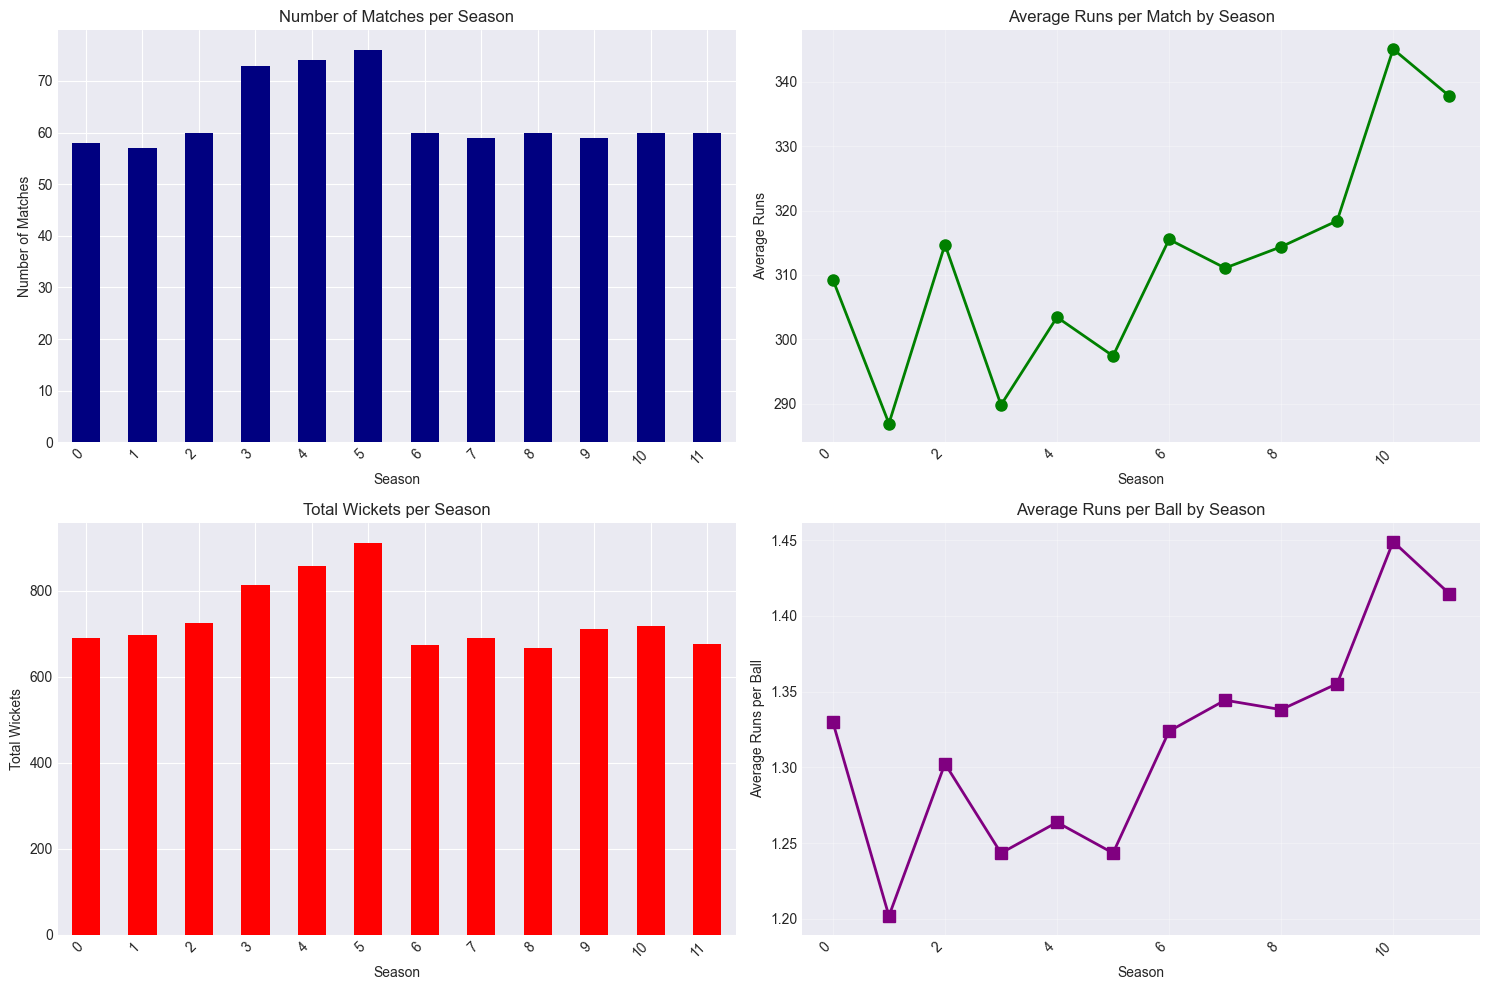

Season-wise Statistics:
    season  total_matches  total_runs  avg_runs_per_ball  total_wickets  \
0     2008             58       17937           1.329750            690   
1     2009             57       16353           1.201896            698   
2     2010             60       18883           1.302456            725   
3     2011             73       21154           1.243402            813   
4     2012             74       22453           1.263747            858   
5     2013             76       22602           1.243440            912   
6     2014             60       18931           1.323846            674   
7     2015             59       18353           1.344345            691   
8     2016             60       18862           1.338110            666   
9     2017             59       18786           1.355216            711   
10    2018             60       20706           1.448985            719   
11    2019             60       20270           1.414712            677   



In [22]:
# Season-wise statistics
season_stats = merged_data.groupby('season').agg({
    'match_id': 'nunique',
    'total_runs': ['sum', 'mean'],
    'is_wicket': 'sum'
}).reset_index()
season_stats.columns = ['season', 'total_matches', 'total_runs', 'avg_runs_per_ball', 'total_wickets']
season_stats['avg_runs_per_match'] = season_stats['total_runs'] / season_stats['total_matches']
season_stats = season_stats.sort_values('season')

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
season_stats['total_matches'].plot(kind='bar', color='navy')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
season_stats['avg_runs_per_match'].plot(kind='line', marker='o', color='green', linewidth=2, markersize=8)
plt.title('Average Runs per Match by Season')
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
season_stats['total_wickets'].plot(kind='bar', color='red')
plt.title('Total Wickets per Season')
plt.xlabel('Season')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
season_stats['avg_runs_per_ball'].plot(kind='line', marker='s', color='purple', linewidth=2, markersize=8)
plt.title('Average Runs per Ball by Season')
plt.xlabel('Season')
plt.ylabel('Average Runs per Ball')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Season-wise Statistics:")
print(season_stats)


### 5.6 Toss Analysis


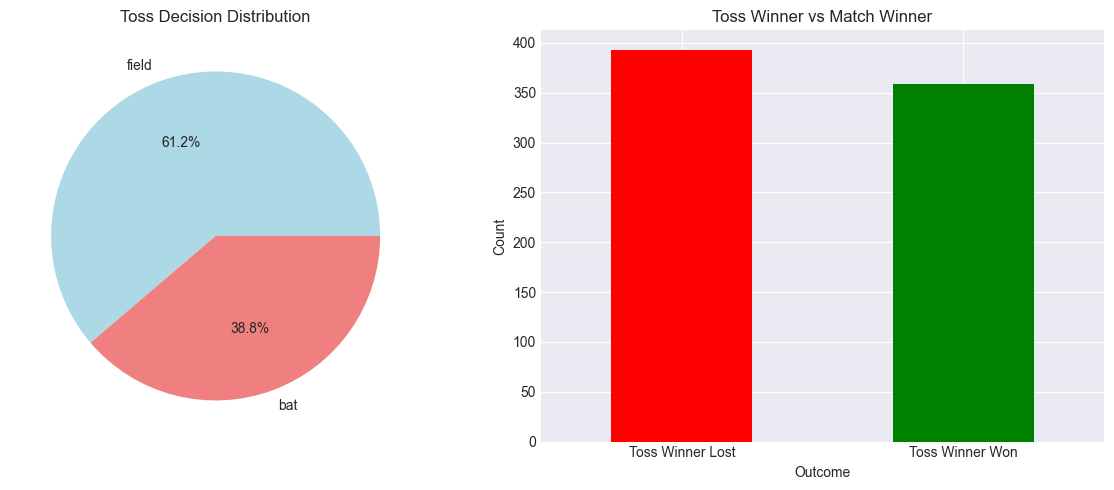

Toss decisions: {'field': np.int64(463), 'bat': np.int64(293)}

Toss winner won the match: 393 times (52.26%)
Toss winner lost the match: 359 times (47.74%)


In [23]:
# Toss decision analysis
toss_decision = matches_clean['toss_decision'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
toss_decision.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Toss Decision Distribution')
plt.ylabel('')

plt.subplot(1, 2, 2)
# Toss winner vs match winner
toss_winner_wins = matches_clean[matches_clean['winner'] != 'No Result']
toss_winner_wins['toss_winner_won'] = (toss_winner_wins['toss_winner'] == toss_winner_wins['winner']).astype(int)
toss_win_rate = toss_winner_wins['toss_winner_won'].value_counts()
toss_win_rate.index = ['Toss Winner Lost', 'Toss Winner Won']
toss_win_rate.plot(kind='bar', color=['red', 'green'])
plt.title('Toss Winner vs Match Winner')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"Toss decisions: {dict(toss_decision)}")
print(f"\nToss winner won the match: {toss_winner_wins['toss_winner_won'].sum()} times ({toss_winner_wins['toss_winner_won'].mean()*100:.2f}%)")
print(f"Toss winner lost the match: {(~toss_winner_wins['toss_winner_won'].astype(bool)).sum()} times ({(1-toss_winner_wins['toss_winner_won'].mean())*100:.2f}%)")


## 6. Key Findings & Summary


In [24]:
# Summary statistics
print("=" * 60)
print("KEY FINDINGS SUMMARY")
print("=" * 60)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total Matches: {matches_clean.shape[0]}")
print(f"   - Total Deliveries: {deliveries_clean.shape[0]:,}")
print(f"   - Seasons Covered: {matches_clean['season'].min()} - {matches_clean['season'].max()}")
print(f"   - Unique Teams: {len(pd.concat([matches_clean['team1'], matches_clean['team2']]).unique())}")
print(f"   - Unique Venues: {matches_clean['venue'].nunique()}")

print("\n2. RUNS ANALYSIS:")
print(f"   - Mean runs per ball: {deliveries_clean['total_runs'].mean():.2f}")
print(f"   - Mean runs per over: {runs_per_over['runs_in_over'].mean():.2f}")
print(f"   - Mean total runs per match: {total_runs_per_match['total_runs'].mean():.2f}")
print(f"   - Highest runs in an over: {runs_per_over['runs_in_over'].max()}")

print("\n3. WICKETS ANALYSIS:")
print(f"   - Total wickets: {len(wickets_data):,}")
print(f"   - Mean wickets per match: {wickets_per_match['total_wickets'].mean():.2f}")
print(f"   - Most common dismissal: {dismissal_counts.index[0]} ({dismissal_counts.iloc[0]} times)")

print("\n4. TEAM PERFORMANCE:")
print(f"   - Team with most wins: {team_wins.index[0]} ({team_wins.iloc[0]} wins)")
print(f"   - Team with highest win %: {team_performance.iloc[0]['team']} ({team_performance.iloc[0]['win_percentage']:.2f}%)")
print(f"   - Team with highest avg runs/match: {team_batting.iloc[0]['team']} ({team_batting.iloc[0]['avg_runs_per_match']:.2f})")

print("\n5. VENUE ANALYSIS:")
print(f"   - Most matches at venue: {venue_stats.iloc[0]['venue']} ({venue_stats.iloc[0]['matches_played']} matches)")
print(f"   - Highest scoring venue (avg): {venue_stats.sort_values('avg_runs_per_match', ascending=False).iloc[0]['venue']}")

print("\n6. TOSS ANALYSIS:")
print(f"   - Toss winner wins match: {toss_winner_wins['toss_winner_won'].mean()*100:.2f}% of the time")
print(f"   - Most common toss decision: {toss_decision.index[0]} ({toss_decision.iloc[0]} times)")

print("\n" + "=" * 60)


KEY FINDINGS SUMMARY

1. DATASET OVERVIEW:
   - Total Matches: 756
   - Total Deliveries: 179,078
   - Seasons Covered: 2008 - 2019
   - Unique Teams: 13
   - Unique Venues: 41

2. RUNS ANALYSIS:
   - Mean runs per ball: 1.31
   - Mean runs per over: 8.10
   - Mean total runs per match: 311.23
   - Highest runs in an over: 37

3. WICKETS ANALYSIS:
   - Total wickets: 8,834
   - Mean wickets per match: 11.69
   - Most common dismissal: caught (5348 times)

4. TEAM PERFORMANCE:
   - Team with most wins: Mumbai Indians (109 wins)
   - Team with highest win %: Chennai Super Kings (60.98%)
   - Team with highest avg runs/match: Chennai Super Kings (nan)

5. VENUE ANALYSIS:
   - Most matches at venue: Eden Gardens (77 matches)
   - Highest scoring venue (avg): Eden Gardens

6. TOSS ANALYSIS:
   - Toss winner wins match: 52.26% of the time
   - Most common toss decision: field (463 times)



## Conclusion

This exploratory data analysis has provided comprehensive insights into the IPL dataset:

1. **Runs Distribution**: The data shows typical cricket scoring patterns with most balls resulting in 0-1 runs, with boundaries (4s and 6s) being key scoring opportunities.

2. **Wickets**: Dismissal patterns follow expected cricket statistics, with caught being the most common dismissal type.

3. **Venue Impact**: Different venues show varying scoring patterns, indicating pitch and ground conditions play a significant role.

4. **Team Performance**: Clear differences exist between teams in terms of batting, bowling, and overall win rates.

5. **Toss Impact**: Toss winner advantage exists but is not overwhelming, showing that skill and performance matter more.

The cleaned datasets are ready for further analysis, feature engineering, and predictive modeling.
